Saving knn_dataset.csv to knn_dataset.csv
Predicted Class: Blue
   Brightness  Saturation Class   Distance
0          40          20   Red  47.434165
1          50          50  Blue  15.811388
2          60          90  Blue  25.495098
3          10          25   Red  60.207973
4          70          70  Blue  15.811388
5          60          10   Red  55.226805
6          25          80  Blue  33.541020


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


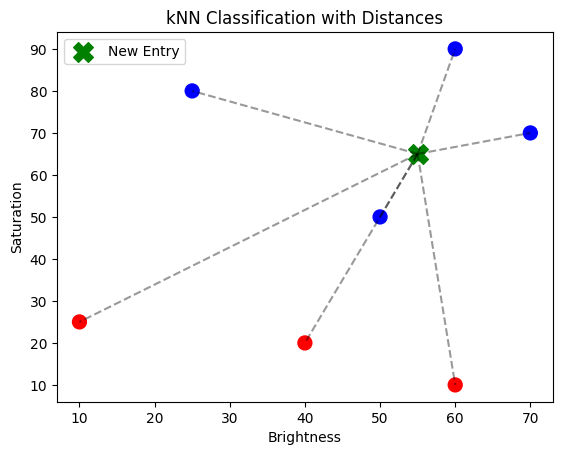

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

X = df[['Brightness','Saturation']]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

new_entry = np.array([[55,65]])
prediction = knn.predict(new_entry)
print("Predicted Class:", prediction[0])

distances = np.sqrt(((X - new_entry[0])**2).sum(axis=1))
df['Distance'] = distances
print(df[['Brightness','Saturation','Class','Distance']])

colors = {'Red':'red','Blue':'blue'}
plt.scatter(df['Brightness'],df['Saturation'],c=df['Class'].map(colors),s=100)
plt.scatter(new_entry[0][0],new_entry[0][1],c='green',marker='X',s=200,label='New Entry')
for i in range(len(df)):
    plt.plot([new_entry[0][0],df['Brightness'][i]],[new_entry[0][1],df['Saturation'][i]],'k--',alpha=0.4)
plt.xlabel("Brightness")
plt.ylabel("Saturation")
plt.title("kNN Classification with Distances")
plt.legend()
plt.show()


Saving knn_q2_dataset.csv to knn_q2_dataset.csv
   Brightness  Saturation Class   Distance
0          40          20   Red  47.434165
1          50          50  Blue  15.811388
2          60          90  Blue  25.495098
3          10          25   Red  60.207973
4          70          70  Blue  15.811388
5          60          10   Red  55.226805
6          25          80  Blue  33.541020


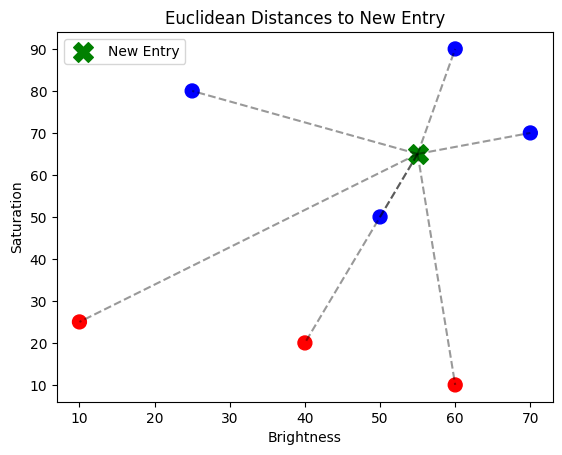

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

new_entry = np.array([55,65])
distances = np.sqrt(((df[['Brightness','Saturation']] - new_entry)**2).sum(axis=1))
df['Distance'] = distances
print(df[['Brightness','Saturation','Class','Distance']])

colors = {'Red':'red','Blue':'blue'}
plt.scatter(df['Brightness'],df['Saturation'],c=df['Class'].map(colors),s=100)
plt.scatter(new_entry[0],new_entry[1],c='green',marker='X',s=200,label='New Entry')
for i in range(len(df)):
    plt.plot([new_entry[0],df['Brightness'][i]],[new_entry[1],df['Saturation'][i]],'k--',alpha=0.4)
plt.xlabel("Brightness")
plt.ylabel("Saturation")
plt.title("Euclidean Distances to New Entry")
plt.legend()
plt.show()
